# Q1: Load all data and plot the sentiment distribution for each airline.

In [137]:
import numpy as np
import csv
import pandas as pd
df = pd.read_csv("Tweets.csv", header=0, delimiter=",", quoting=0)
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


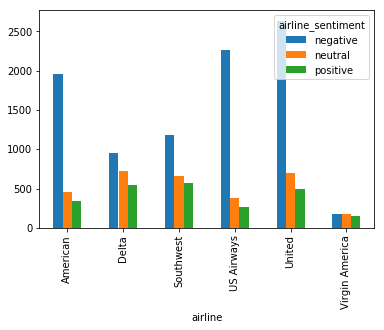

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt

df1=df.groupby(['airline','airline_sentiment']).size()
df1=df1.unstack()
df1.plot(kind='bar')
plt.show()

# Q2: Remove URLs and mentions and rename hashtag sign to ‘hashtag_’. Vectorize tweets using count vectorizer. 

In [139]:
airline_text = df.text.tolist()
import re
urlregex = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', re.UNICODE | re.IGNORECASE)
hashtagregex = re.compile('(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)', re.UNICODE | re.IGNORECASE)
mentionregex = re.compile('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z0-9_]+[A-Za-z0-9_]+)', re.UNICODE | re.IGNORECASE)
text_new =[]
for i in range(len(airline_text)):
    airline_text[i] = urlregex.sub('',airline_text[i])
    airline_text[i] = re.sub(':','',airline_text[i])
    airline_text[i] = mentionregex.sub('',airline_text[i])
    airline_text[i] = re.sub('\.(?!$)', '',airline_text[i])
    airline_text[i] = re.sub('^RT','',airline_text[i])
    airline_text[i] = hashtagregex.sub(r' hashtag_\1',airline_text[i])
    airline_text[i] = airline_text[i].replace('\n','')    
    airline_text[i] = airline_text[i].lstrip(' ')
    text_new.append(airline_text[i])
text_new

['What  said.',
 "plus you've added commercials to the experience tacky.",
 "I didn't today Must mean I need to take another trip!",
 'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "and it's a really big bad thing about it",
 "seriously would pay $30 a flight for seats that didn't have this playingit's really the only bad thing about flying VA",
 'yes, nearly every time I fly VX this “ear worm” won’t go away )',
 'Really missed a prime opportunity for Men Without Hats parody, there ',
 "Well, I didn't…but NOW I DO! -D",
 "it was amazing, and arrived an hour early You're too good to me.",
 'did you know that suicide is the second leading cause of death among teens 10-24',
 'I &lt;3 pretty graphics so much better than minimal iconography D',
 "This is such a great deal! Already thinking about my 2nd trip to  &amp; I haven't even gone on my 1st trip yet! ;p",
 "I'm flying your  hashtag_fabulous  hashtag_Seductive skies

In [140]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect = CountVectorizer(binary = False, min_df = 10)

X = vect.fit_transform(text_new)
print(X.shape)
print(X.toarray())

(14640, 1861)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Q3: For each airline, train a logistic regression and perform 10-fold crossvalidation and report the accuracy and F1 score (with weighted average). Analyze your result. 

In [142]:
#Filtering the airlines
#Virgin America
airline_VA = df.query('airline == "Virgin America"')
print(airline_VA)

#American
airline_A = df.query('airline == "American"')
print(airline_A)

#Delta
airline_D = df.query('airline == "Delta"')
print(airline_D)

#United
airline_U = df.query('airline == "United"')
print(airline_U)

#Southwest
airline_S = df.query('airline == "Southwest"')
print(airline_S)

#US Airways
airline_USA = df.query('airline == "US Airways"')
print(airline_USA)

               tweet_id airline_sentiment  airline_sentiment_confidence  \
0    570306133677760513           neutral                        1.0000   
1    570301130888122368          positive                        0.3486   
2    570301083672813571           neutral                        0.6837   
3    570301031407624196          negative                        1.0000   
4    570300817074462722          negative                        1.0000   
5    570300767074181121          negative                        1.0000   
6    570300616901320704          positive                        0.6745   
7    570300248553349120           neutral                        0.6340   
8    570299953286942721          positive                        0.6559   
9    570295459631263746          positive                        1.0000   
10   570294189143031808           neutral                        0.6769   
11   570289724453216256          positive                        1.0000   
12   570289584061480960  

In [167]:
#Logistic regression and a 10-fold crossvalidation over each airline
from sklearn.metrics  import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
score_acc = []
f1score = []
metrics = [accuracy_score]
#precision_score(y_true, y_pred, average= 'weighted')

airlinelist = [airline_VA, airline_A, airline_D, airline_U, airline_S, airline_USA]

for i in airlinelist:
    airline = i  
    airline = airline.reset_index(drop=True)
    
    kf = KFold(n_splits=10)
    for train, valid in kf.split(airline['airline_sentiment']):
        X_train_text = airline['text'][train]
        y_train = airline['airline_sentiment'][train]

        X_valid_text = airline['text'][valid]
        y_valid = airline['airline_sentiment'][valid]

        vect = CountVectorizer(min_df = .0005)

        X_train = vect.fit_transform(X_train_text)
        X_valid = vect.transform(X_valid_text)

        LR = LogisticRegression(C = 5)
        LR.fit(X_train, y_train)

        p_valid = LR.predict(X_valid)
        score_acc.append(accuracy_score(y_valid, p_valid))
        f1score.append(f1_score(y_valid, p_valid, average = 'weighted'))
    
    accscore = np.array(score_acc).mean()
    print("Accuracy:")
    print(accscore)

    F1_score = np.array(f1score).mean()
    print("Weighted F1 score:")
    print(F1_score)
    print(' ')
    
    print(classification_report(y_valid, p_valid, digits = 3))

Accuracy:
0.6289411764705882
Weighted F1 score:
0.6324084240965357
 
             precision    recall  f1-score   support

   negative      0.412     0.636     0.500        11
    neutral      0.667     0.500     0.571        20
   positive      0.500     0.474     0.486        19

avg / total      0.547     0.520     0.523        50

Accuracy:
0.7104495078663876
Weighted F1 score:
0.7092687493528737
 
             precision    recall  f1-score   support

   negative      0.856     0.912     0.883       215
    neutral      0.321     0.265     0.290        34
   positive      0.889     0.615     0.727        26

avg / total      0.793     0.804     0.795       275

Accuracy:
0.7040623134762573
Weighted F1 score:
0.7026386967744433
 
             precision    recall  f1-score   support

   negative      0.733     0.787     0.759        94
    neutral      0.678     0.548     0.606        73
   positive      0.613     0.691     0.650        55

avg / total      0.685     0.685     0.682 

#Analysis

Even though the training and validation data sets keep changing on every run, it seems like the accuracy and f1_score values remain the lowest for virgin america airlines, these could be likely because upon comparison it could be seen that virgin america airlines has lesser data with respect to the rest of the airlines. Similarly, the accuracy and f1 score values seem to be highest for united states airways, maybe because of higher amounts of data.

# Q4: Repeat Q3 with multinomial Naïve Bayes classifier, and compare your result with Q3.

In [170]:
#Multinomial Naive bayes classifier and a 10-fold crossvalidation
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
score_accuracy = []
airlinelist = [airline_VA, airline_A, airline_D, airline_U, airline_S, airline_USA]

for i in airlinelist:
    airline = i  
    airline = airline.reset_index(drop=True)

    kf = KFold(n_splits=10)
    for train, valid in kf.split(airline['airline_sentiment']):
        X_train_text1 = airline['text'][train]
        y_train1 = airline['airline_sentiment'][train]
      
        X_valid_text1 = airline['text'][valid]
        y_valid1 = airline['airline_sentiment'][valid]

        count = CountVectorizer(min_df = 1, stop_words = 'english')
        
        X_train1 = count.fit_transform(X_train_text1)
        X_valid1 = count.transform(X_valid_text1)

        MNB = MultinomialNB(alpha=0.1)
        MNB.fit(X_train1, y_train1)
        
        p_valid1 = MNB.predict(X_valid1)
        score_acc.append(accuracy_score(y_valid1, p_valid1))
        f1score.append(f1_score(y_valid1, p_valid1, average = 'weighted'))

    accscore = np.array(score_acc).mean()
    print("Accuracy:")
    print(accscore)

    F1_score = np.array(f1score).mean()
    print("Weighted F1 score:")
    print(F1_score)
    print(' ')
    
    print(classification_report(y_valid1, p_valid1, digits = 3))

Accuracy:
0.7160804670093242
Weighted F1 score:
0.7064486404269631
 
             precision    recall  f1-score   support

   negative      0.200     0.364     0.258        11
    neutral      0.385     0.250     0.303        20
   positive      0.529     0.474     0.500        19

avg / total      0.399     0.360     0.368        50

Accuracy:
0.7192222275850767
Weighted F1 score:
0.708903191502569
 
             precision    recall  f1-score   support

   negative      0.840     0.949     0.891       215
    neutral      0.400     0.176     0.245        34
   positive      0.706     0.462     0.558        26

avg / total      0.773     0.807     0.780       275

Accuracy:
0.7168439534760925
Weighted F1 score:
0.7065075142050329
 
             precision    recall  f1-score   support

   negative      0.684     0.830     0.750        94
    neutral      0.680     0.466     0.553        73
   positive      0.638     0.673     0.655        55

avg / total      0.671     0.671     0.662  

#Comparison with Q3

When compared with logistic regression, the accuracy and f1_score values seem to be lying more closer and even for all the airlines for the values for multinomial Naive bayes Classifier. Also if we check the precision and recall values for Delta airlines for both Logistic regression and multinomial Naive Bayes classifier, we see that they are same values, which is a good sign. For others they are pretty close.

# Q5: Join all airlines together then train logistic regression and multinomial Naïve Bayes with 10-folds cross-validation and analyze your result. 

In [146]:
#Logistic regression and a 10-fold crossvalidation for all the airlines together
from sklearn.metrics  import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
metrics = [accuracy_score, f1_score]
scores = []
    
kf = KFold(n_splits=10)
for train, valid in kf.split(df['airline_sentiment']):
    X_train_text = df['text'][train]
    y_train = df['airline_sentiment'][train]

    X_valid_text = df['text'][valid]
    y_valid = df['airline_sentiment'][valid]

    vect = CountVectorizer(binary = False, stop_words='english')

    X_train = vect.fit_transform(X_train_text)
    X_valid = vect.transform(X_valid_text)

    LR = LogisticRegression(C = 5)
    LR.fit(X_train, y_train)

    p_valid = LR.predict(X_valid)
    score_acc.append(accuracy_score(y_valid, p_valid))
    f1score.append(f1_score(y_valid, p_valid, average = 'weighted'))
    
accscore = np.array(score_acc).mean()
print("Accuracy:")
print(accscore)

F1_score = np.array(f1score).mean()
print("Weighted F1 score:")
print(F1_score)
print(' ')

0.7297419390552612
0.7215903021888405
 


In [147]:
#Multinomial naive bayes classifier and a 10-fold crossvalidation for all the airlines together
from sklearn.metrics  import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
metrics = [accuracy_score, f1_score]
scores = []
    
kf = KFold(n_splits=10)
for train, valid in kf.split(df['airline_sentiment']):
    X_train_text = df['text'][train]
    y_train = df['airline_sentiment'][train]

    X_valid_text = df['text'][valid]
    y_valid = df['airline_sentiment'][valid]

    vect = CountVectorizer(binary = False, stop_words='english')

    X_train = vect.fit_transform(X_train_text)
    X_valid = vect.transform(X_valid_text)

    MNB = MultinomialNB(alpha=0.1)
    MNB.fit(X_train, y_train)
        
    p_valid = MNB.predict(X_valid)
    score_acc.append(accuracy_score(y_valid, p_valid))
    f1score.append(f1_score(y_valid, p_valid, average = 'weighted'))
    
accscore = np.array(score_acc).mean()
print("Accuracy:")
print(accscore)

F1_score = np.array(f1score).mean()
print("Weighted F1 score:")
print(F1_score)
print(' ')

0.7314865624560759
0.7228903365576648
 


#Analysis

The F1 scores when calculated for all the airlines together for both logistic regression and Naive Bayes classifier, are found to be almost equal to each other and the accuracy is higher for multinomial Naive bayes classifier when compared with the logistic regression.

# Q6: Randomly select 20% of joined data and reserve that for the validation purpose, and the remaining data for the training purpose. Generate a learning curve by gradually adding training data (e.g. using 5, 10, 15, ..., 80 percent for the training). Plot the accuracy of logistic regression and multinomial Naïve Bayes (on one plot) and analyze your results. 

In [148]:
#First shuffle data
df = df.sample(frac=1, random_state= 100)

X_train_text = df['text'][:11712]
y_train = df['airline_sentiment'][:11712]

X_valid_text = df['text'][11712:]
y_valid = df['airline_sentiment'][11712:]

print(y_train.shape, X_train_text.shape, y_valid.shape, X_valid_text.shape)

(11712,) (11712,) (2928,) (2928,)


In [182]:
#Logistic Regression
scores_LR = []
accuracy_log_LR =[]
metrics = [precision_score, recall_score, f1_score]
for i in np.arange(0.05,0.85,0.05):
    j = int(round(i*14640))
    X_train_text = df['text'][:j]
    y_train = df['airline_sentiment'][:j]
    
    vect = CountVectorizer(binary = False)
    
    X_train = vect.fit_transform(X_train_text)
    X_valid = vect.transform(X_valid_text)
    
    LR = LogisticRegression(C=5)
    LR.fit(X_train,y_train)
    
    p_valid = LR.predict(X_valid)
    accuracy_log_LR.append([int(i*100),accuracy_score(y_valid,p_valid)])
    scores_LR.append([metric(y_valid, p_valid, average = 'weighted') for metric in metrics])

accuracy_log_LR
scores_LR = np.array(scores_LR)
print(scores_LR)

[[0.73167532 0.7432377  0.7332914 ]
 [0.76536099 0.77349727 0.76626809]
 [0.78709391 0.79289617 0.78816763]
 [0.80137935 0.8067623  0.80256793]
 [0.81958206 0.82370219 0.82059019]
 [0.83490897 0.83818306 0.83577213]
 [0.84718905 0.85       0.84791114]
 [0.86017028 0.86222678 0.8607587 ]
 [0.87179768 0.87342896 0.87240326]
 [0.88157039 0.88319672 0.88212232]
 [0.89394475 0.89508197 0.89430025]
 [0.90706476 0.9079235  0.90733776]
 [0.91526812 0.91605191 0.91554456]
 [0.92346128 0.92411202 0.92368885]
 [0.9308424  0.93135246 0.93100991]
 [0.93903826 0.93948087 0.93918559]]


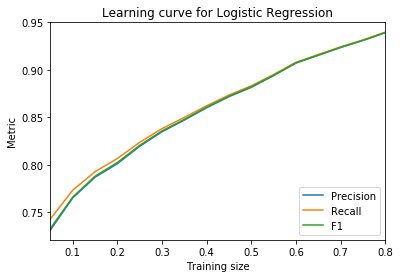

In [183]:
%matplotlib inline

size = np.arange(0.05,0.85,0.05)
plt.title("Learning curve for Logistic Regression")

#plt.plot(size, scores_NB[:, 0], label = 'Accuracy')
plt.plot(size, scores_LR[:, 0], label = 'Precision')
plt.plot(size, scores_LR[:, 1], label = 'Recall')
plt.plot(size, scores_LR[:, 2], label = 'F1')

plt.xlabel('Training size')
plt.ylabel('Metric')
plt.xlim(size.min(), size.max())
plt.legend(loc = 'lower right')
plt.show()

In [184]:
#Multinomial Naive Bayes Classifier
scores_NB = []
accuracy_log_NB =[]
metrics = [precision_score, recall_score, f1_score]
for i in np.arange(0.05,0.85,0.05):
    j = int(round(i*14640))
    X_train_text = df['text'][:j]
    y_train = df['airline_sentiment'][:j]
    
    X_valid_text = df['text']
    y_valid = df['airline_sentiment']
    
    vect = CountVectorizer(binary = False)
    
    X_train = vect.fit_transform(X_train_text)
    X_valid = vect.transform(X_valid_text)
    
    MNB = MultinomialNB(alpha = 0.1)
    MNB.fit(X_train, y_train)

    p_valid = MNB.predict(X_valid)
    accuracy_log_NB.append([int(i*100),accuracy_score(y_valid,p_valid)])
    scores_NB.append([metric(y_valid, p_valid, average = 'weighted') for metric in metrics])

accuracy_log_NB
scores_NB = np.array(scores_NB)
print(scores_NB)

[[0.720157   0.73715847 0.71946353]
 [0.75037626 0.76352459 0.74825609]
 [0.77237798 0.78265027 0.77088136]
 [0.7861505  0.79480874 0.78473311]
 [0.79778266 0.80546448 0.79684073]
 [0.80927703 0.81605191 0.80836022]
 [0.81926049 0.82520492 0.81877574]
 [0.82825154 0.83333333 0.828034  ]
 [0.83680233 0.84146175 0.83715657]
 [0.8458005  0.84993169 0.84591388]
 [0.85279324 0.85635246 0.85313036]
 [0.86188041 0.86502732 0.86231398]
 [0.86662597 0.86953552 0.86700182]
 [0.87396181 0.87643443 0.87435738]
 [0.8801217  0.88230874 0.88044266]
 [0.88682339 0.88872951 0.88710262]]


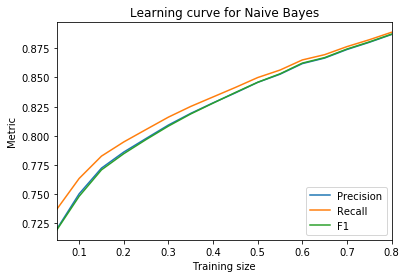

In [185]:
%matplotlib inline

size = np.arange(0.05,0.85,0.05)
plt.title("Learning curve for Naive Bayes")

#plt.plot(size, scores_NB[:, 0], label = 'Accuracy')
plt.plot(size, scores_NB[:, 0], label = 'Precision')
plt.plot(size, scores_NB[:, 1], label = 'Recall')
plt.plot(size, scores_NB[:, 2], label = 'F1')

plt.xlabel('Training size')
plt.ylabel('Metric')
plt.xlim(size.min(), size.max())
plt.legend(loc = 'lower right')
plt.show()

In [186]:
%matplotlib inline

scores_log_LR = np.array(scores_log_LR)
scores_log_NB = np.array(scores_log_NB)
size = np.arange((0.05*14640),int(0.8*14640+1),(0.05*14640))

plt.plot(size, accuracy_log_LR[:,1], label = "Logistic Regression")
plt.plot(size, accuracy_log_NB[:,1], label = "Multinomial Naive Bayes")
plt.xlabel("Training size")
plt.ylabel("Metric")
plt.xlim(size.min(),size.max())
plt.legend(loc='lower right')
plt.title("Accuracies for Logistic regression and multinomial naive bayes classifier")
plt.show()

TypeError: list indices must be integers or slices, not tuple

#Analysis

Here the amount of sample data is increased for the training data in steps and the impact on validation data is being verified, for this it is necessary to shuffle the data and hence shuffling was done.
Accuracy is the ratio of correctly predicted observations to the total observations. Only this metric would not help in deciding if a model is good. F1 score which is the harmonic average of Precision and Recall along with the metric accuracy helps in determining the goodness of the model. 
The accuracies and F1 scores are different for each airlines. Virgin America has the least accuracy and United States Airways has the highest accuracy as mentioned in our earlier analysis. 
We also see the F1 scores and the accuracy values are almost close for all the airlines. Thus, even if we cannot interpret much via the accuracy values, the F1 scores seem to indicate that the models for each of the airlines perform fairly well.